# Unimodal - CMU-MOSEI

In [ ]:
!git clone https://github.com/M-Jafarkhani/Multimodal-Emotion-Recognition

In [3]:
import gdown

file_id = "1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU"
destination = "mosi_raw.pkl" 

gdown.download(
    f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU
From (redirected): https://drive.google.com/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU&confirm=t&uuid=3f08be8a-4586-43ab-a6fb-6f6c17112264
To: /content/mosi_raw.pkl
100%|██████████| 357M/357M [00:04<00:00, 72.5MB/s]


'mosi_raw.pkl'

In [4]:
import sys
import torch
import matplotlib.pyplot as plt

sys.path.append('/content/Multimodal-Emotion-Recognition/src')

In [5]:
from loader import get_dataloader
from unimodals.modules import GRU, MLP
from training.unimodal import train, test
from utils import get_default_device, save_results

In [6]:
traindata, validdata, testdata = get_dataloader(
    "/content/mosi_raw.pkl", max_pad=True, max_seq_len=50
)

In [7]:
device = get_default_device()
print(device)

cuda


In [8]:
modality_num = 2

encoder = GRU(
    300, 600, dropout=True, has_padding=False, batch_first=True, last_only=True
).to(device)

head = MLP(600, 512, 1).to(device)


In [9]:
OUTPUT_MODEL_FILE_NAME = 'MOSI_Unimodal'
train_losses, valid_losses = train(
    encoder,
    head,
    traindata,
    validdata,
    200,
    task="regression",
    optimtype=torch.optim.AdamW,
    lr=2e-3,
    weight_decay=0.01,
    criterion=torch.nn.L1Loss(),
    save_encoder=f"/content/{OUTPUT_MODEL_FILE_NAME}_encoder.pt",
    save_head=f"/content/{OUTPUT_MODEL_FILE_NAME}_head.pt",
    modalnum=modality_num,
)


Epoch [1/200]
Train Loss: 1.3274
Valid Loss: 1.3948
Saving Best

Epoch [2/200]
Train Loss: 1.3240
Valid Loss: 1.3865
Saving Best

Epoch [3/200]
Train Loss: 1.3241
Valid Loss: 1.4004

Epoch [4/200]
Train Loss: 1.3257
Valid Loss: 1.3734
Saving Best

Epoch [5/200]
Train Loss: 1.3214
Valid Loss: 1.3832

Epoch [6/200]
Train Loss: 1.3184
Valid Loss: 1.3826

Epoch [7/200]
Train Loss: 1.3160
Valid Loss: 1.3869

Epoch [8/200]
Train Loss: 1.3178
Valid Loss: 1.3807

Epoch [9/200]
Train Loss: 1.3252
Valid Loss: 1.3864

Epoch [10/200]
Train Loss: 1.3182
Valid Loss: 1.3889

Epoch [11/200]
Train Loss: 1.3200
Valid Loss: 1.3830

Epoch [12/200]
Train Loss: 1.3201
Valid Loss: 1.3905

Epoch [13/200]
Train Loss: 1.3486
Valid Loss: 1.4844

Epoch [14/200]
Train Loss: 1.3292
Valid Loss: 1.4143

Epoch [15/200]
Train Loss: 1.3086
Valid Loss: 1.3932

Epoch [16/200]
Train Loss: 1.1126
Valid Loss: 1.2001
Saving Best

Epoch [17/200]
Train Loss: 0.9036
Valid Loss: 1.0860
Saving Best

Epoch [18/200]
Train Loss: 0.80

Text(0.5, 1.0, 'Loss vs. No. of epochs')

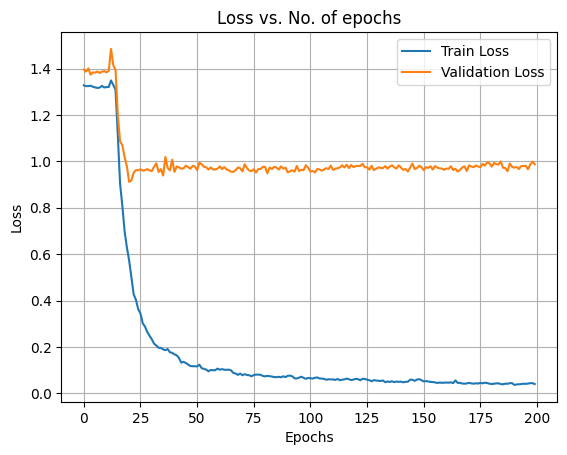

In [10]:
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss vs. No. of epochs')

In [11]:
save_results(train_losses, valid_losses, f'/content/{OUTPUT_MODEL_FILE_NAME}.pkl')

In [12]:
encoder = torch.load(
    f"/content/{OUTPUT_MODEL_FILE_NAME}_encoder.pt"
).to(device)
head = torch.load(
    f"/content/{OUTPUT_MODEL_FILE_NAME}_head.pt"
).to(device)

test(
    encoder,
    head,
    testdata,
    criterion=torch.nn.L1Loss(),
    task="posneg-classification",
    modalnum=modality_num,
)

<ipython-input-12-873f8a5316df>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder = torch.load(
<ipython-input-12-873f8a5316df>:4: FutureWarning: You are using `torch

Loss: 1.0748
Recall: 72.4085% | Total Accuracy: 71.2828%
Inference Time: 388ms
Inference Params: 1931825
